In [1]:
import numpy as np
from scipy.special import factorial, assoc_laguerre
import matplotlib.pyplot as plt
%matplotlib inline
from starkhelium import *
from tqdm import trange, tqdm
import os

In [48]:
#def associateLaguerrePoly(k, n, x):
#    return np.sum( [
#        ( factorial(n+k) / ( factorial(n-m) * factorial(k+m) * factorial(m) ) ) * x**m 
#        for m in range(n+1)], axis=0 )

In [135]:
# Hydrogen radial wavefunction

r = np.linspace(0,10,1000) * 10**-10 # Radial position, in Ang
Z = 1 # Charge
epsilon_0 = 8.85418782 * 10**-12
hbar = 1.05457180013*10**-34
m_p = 1.6726219 * 10**-27
m_e = 9.10938356 * 10**-31
e = 1.60217662 * 10**-19
a_0 = 4 * np.pi * epsilon_0 * hbar**2 / (m_e * e**2)
M = m_p
reduced_mass = m_e * M / (m_e + M)
a = (m_e / reduced_mass) * a_0


# Quantum numbers
n = 2
l = 0

N_n_l = ( (2*Z) / (n*a) )**(3/2) * ( factorial(n-l-1) / factorial(2*n*(n+l)) )**0.5
#lagPoly = associateLaguerrePoly(2*l+1, n-l-1, (2*Z*r)/(n*a))
lagPoly = assoc_laguerre((2*Z*r)/(n*a), n-l-1, 2*l+1)

R_n_l = N_n_l * ((2*Z*r) / (n*a))**l * np.exp(-(Z*r) / (n*a)) * lagPoly

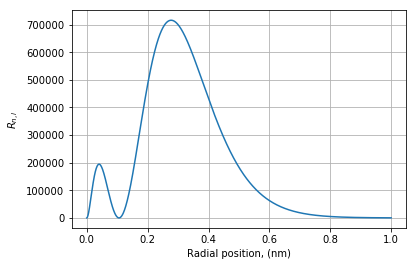

In [136]:
plt.plot(r * 10**9, R_n_l**2 * r**2)
plt.xlabel('Radial position, (nm)')
plt.ylabel('$R_{n,l}$')
plt.grid()

In [2]:
rad_overlap(10,10,0,1, p=1.0)

149.25817404521496